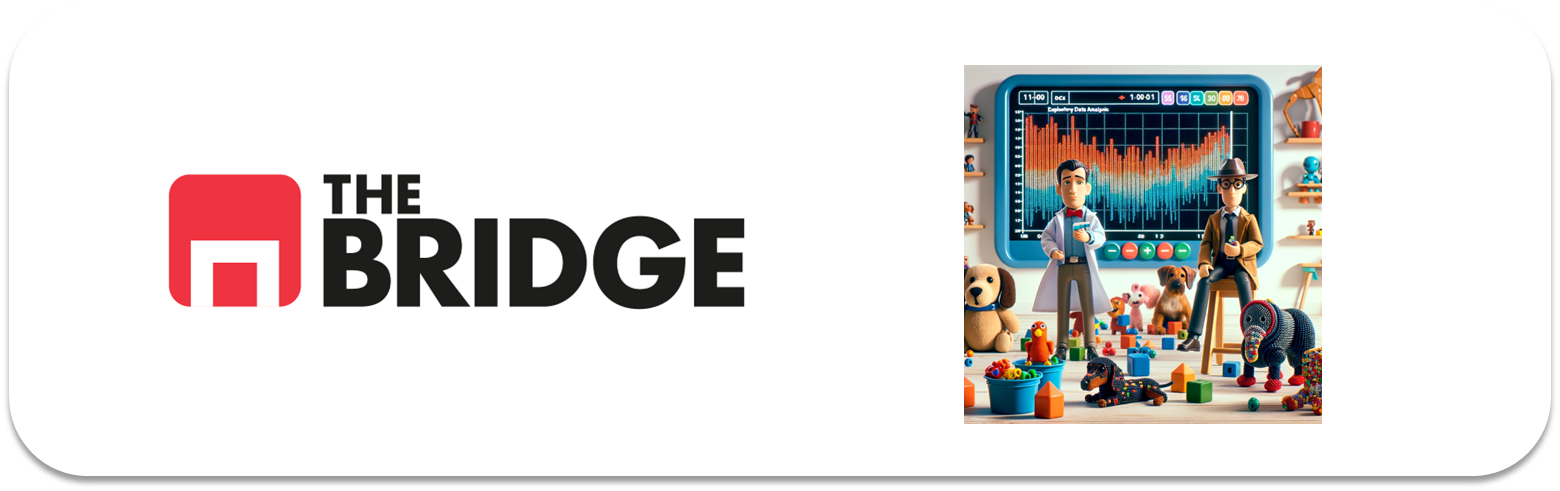

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bootcampviztools import (
    pinta_distribucion_categoricas,
    plot_categorical_relationship_fin,
    plot_categorical_numerical_relationship,
    plot_combined_graphs,
    plot_grouped_boxplots,
    plot_grouped_histograms,
    grafico_dispersion_con_correlacion,
    bubble_plot
)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

ruta_base = r"C:/Users/Jesus/Documents/DS_Online_Octubre24_Exercises/03_Analisis_de_Datos/Sprint_07/Unidad_02/Practica_Obligatoria/data"

df_titanic = pd.read_csv(f"{ruta_base}/titanic.csv")
df_viajes_jun = pd.read_csv(f"{ruta_base}/dataset_viajes_jun23.csv")
df_viajes_jul = pd.read_csv(f"{ruta_base}/dataset_viajes_jul23.csv")
df_marketing = pd.read_csv(f"{ruta_base}/Marketing-Customer-Analysis.csv")


print("Dataset Titanic:")
print(df_titanic.info())
print("\nDataset Viajes Junio:")
print(df_viajes_jun.info())
print("\nDataset Viajes Julio:")
print(df_viajes_jul.info())
print("\nDataset Marketing:")
print(df_marketing.info())





Dataset Titanic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Dataset Viajes Junio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [ ]:
import pandas as pd

ruta_titanic = "./data/titanic.csv"
df_titanic = pd.read_csv(ruta_titanic)

print(df_titanic.info())
print(df_titanic.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male 

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [ ]:
columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]
df_titanic = df_titanic.drop(columns=columnas_a_eliminar)

print(df_titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB
None


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [ ]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

df_titanic = df_titanic.drop(columns=["parch", "sibsp"])

print(df_titanic.info())
print(df_titanic.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB
None
      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
moda_embark_town = df_titanic["embark_town"].mode()[0]  # Obtener la moda
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(moda_embark_town)  # Reemplazar valores nulos

print(df_titanic["embark_town"].isnull().sum())


0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [3]:
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].mean())

df_titanic["age"] = df_titanic.groupby("who")["age"].transform(
    lambda grp: grp.fillna(grp.mean())
)

print(df_titanic["age"].isnull().sum())


NameError: name 'df_titanic' is not defined

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [ ]:
absolutos_sexo = df_titanic.groupby("sex")["alive"].value_counts()
relativos_sexo = df_titanic.groupby("sex")["alive"].value_counts(normalize=True)

absolutos_quien = df_titanic.groupby("who")["alive"].value_counts()
relativos_quien = df_titanic.groupby("who")["alive"].value_counts(normalize=True)

print("Supervivencia en términos absolutos por sexo:\n", absolutos_sexo)
print("\nSupervivencia en términos relativos por sexo:\n", relativos_sexo)
print("\nSupervivencia en términos absolutos por categoría (who):\n", absolutos_quien)
print("\nSupervivencia en términos relativos por categoría (who):\n", relativos_quien)

from scipy.stats import chi2_contingency

tabla_sexo = pd.crosstab(df_titanic["sex"], df_titanic["alive"])
chi2_sexo, p_sexo, _, _ = chi2_contingency(tabla_sexo)

print("Chi-cuadrado para sexo y supervivencia:")
print(f"Chi2: {chi2_sexo}, p-value: {p_sexo}")

tabla_edad = pd.crosstab(df_titanic["who"], df_titanic["alive"])
chi2_edad, p_edad, _, _ = chi2_contingency(tabla_edad)

print("Chi-cuadrado para edad y supervivencia:")
print(f"Chi2: {chi2_edad}, p-value: {p_edad}")


Supervivencia en términos absolutos por sexo:
 sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: count, dtype: int64

Supervivencia en términos relativos por sexo:
 sex     alive
female  yes      0.742038
        no       0.257962
male    no       0.811092
        yes      0.188908
Name: proportion, dtype: float64

Supervivencia en términos absolutos por categoría (who):
 who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64

Supervivencia en términos relativos por categoría (who):
 who    alive
child  yes      0.590361
       no       0.409639
man    no       0.836127
       yes      0.163873
woman  yes      0.756458
       no       0.243542
Name: proportion, dtype: float64
Chi-cuadrado para sexo y supervivencia:
Chi2: 260.71702016732104, p-value: 1.1973570627755645e-58
Chi-cuadrado para edad y supervivencia:
Chi2: 283.923050324

In [ ]:
absolutos_clase = df_titanic.groupby("class")["alive"].value_counts()
relativos_clase = df_titanic.groupby("class")["alive"].value_counts(normalize=True)

print("Supervivencia en términos absolutos por clase:\n", absolutos_clase)
print("\nSupervivencia en términos relativos por clase:\n", relativos_clase)

tabla_clase = pd.crosstab(df_titanic["class"], df_titanic["alive"])
chi2_clase, p_clase, _, _ = chi2_contingency(tabla_clase)

print("Chi-cuadrado para clase y supervivencia:")
print(f"Chi2: {chi2_clase}, p-value: {p_clase}")


Supervivencia en términos absolutos por clase:
 class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64

Supervivencia en términos relativos por clase:
 class   alive
First   yes      0.629630
        no       0.370370
Second  no       0.527174
        yes      0.472826
Third   no       0.757637
        yes      0.242363
Name: proportion, dtype: float64
Chi-cuadrado para clase y supervivencia:
Chi2: 102.88898875696056, p-value: 4.549251711298793e-23


In [ ]:
absolutos_embark = df_titanic.groupby("embark_town")["alive"].value_counts()
relativos_embark = df_titanic.groupby("embark_town")["alive"].value_counts(normalize=True)

print("Supervivencia en términos absolutos por ciudad de embarque:\n", absolutos_embark)
print("\nSupervivencia en términos relativos por ciudad de embarque:\n", relativos_embark)

tabla_embark = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"])
chi2_embark, p_embark, _, _ = chi2_contingency(tabla_embark)

print("Chi-cuadrado para ciudad de embarque y supervivencia:")
print(f"Chi2: {chi2_embark}, p-value: {p_embark}")



Supervivencia en términos absolutos por ciudad de embarque:
 embark_town  alive
Cherbourg    yes       93
             no        75
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64

Supervivencia en términos relativos por ciudad de embarque:
 embark_town  alive
Cherbourg    yes      0.553571
             no       0.446429
Queenstown   no       0.610390
             yes      0.389610
Southampton  no       0.660991
             yes      0.339009
Name: proportion, dtype: float64
Chi-cuadrado para ciudad de embarque y supervivencia:
Chi2: 25.964452881874784, p-value: 2.3008626481449577e-06


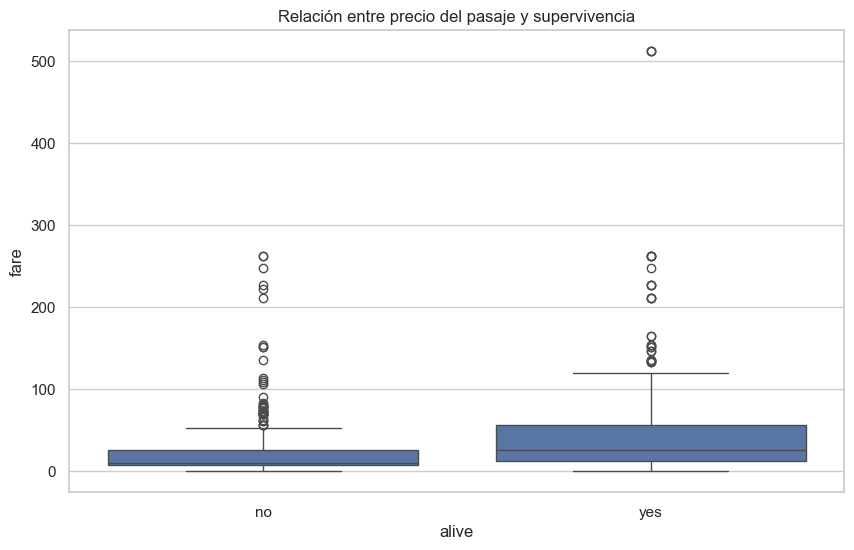

In [16]:
sns.boxplot(x="alive", y="fare", data=df_titanic)
plt.title("Relación entre precio del pasaje y supervivencia")
plt.show()


In [ ]:
sin_pago = df_titanic[df_titanic["fare"] == 0]

max_fare = df_titanic[df_titanic["fare"] == df_titanic["fare"].max()]

print("Pasajeros que no pagaron:\n", sin_pago)
print("\nPersona que más pagó:\n", max_fare)


Pasajeros que no pagaron:
       sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
7

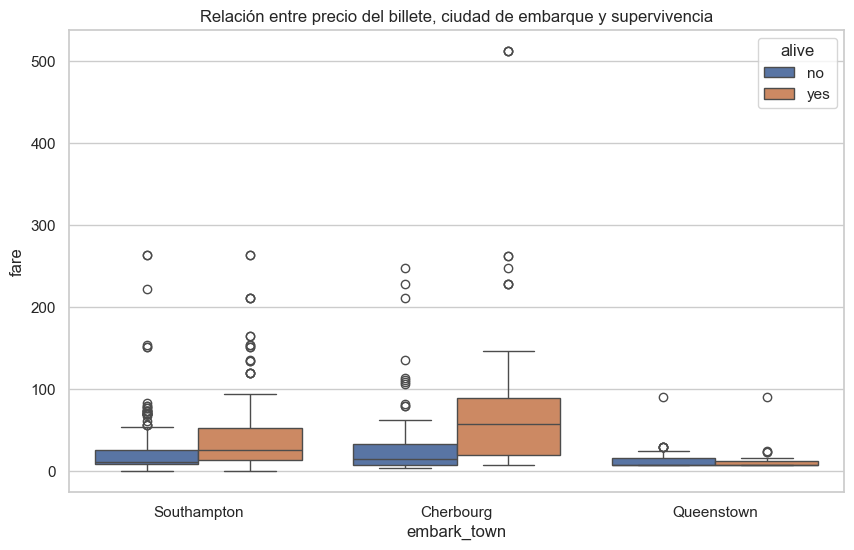

In [18]:
sns.boxplot(x="embark_town", y="fare", hue="alive", data=df_titanic)
plt.title("Relación entre precio del billete, ciudad de embarque y supervivencia")
plt.show()


Relación entre clase, categoría y supervivencia:
 alive               no       yes
class  who                      
First  child  0.166667  0.833333
       man    0.647059  0.352941
       woman  0.021978  0.978022
Second child       NaN  1.000000
       man    0.919192  0.080808
       woman  0.090909  0.909091
Third  child  0.568966  0.431034
       man    0.880878  0.119122
       woman  0.508772  0.491228


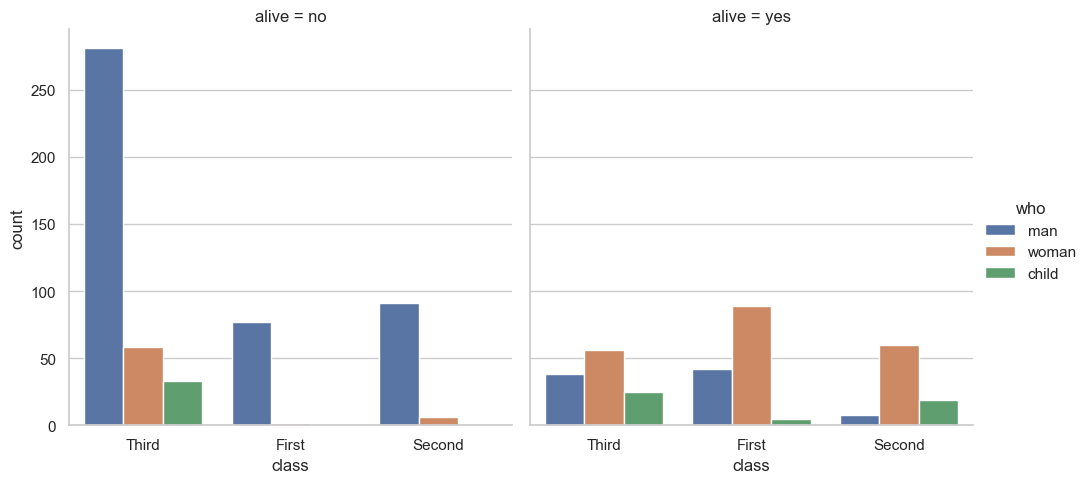

In [ ]:
agrupacion = df_titanic.groupby(["class", "who"])["alive"].value_counts(normalize=True).unstack()

print("Relación entre clase, categoría y supervivencia:\n", agrupacion)

sns.catplot(x="class", hue="who", col="alive", data=df_titanic, kind="count")
plt.show()


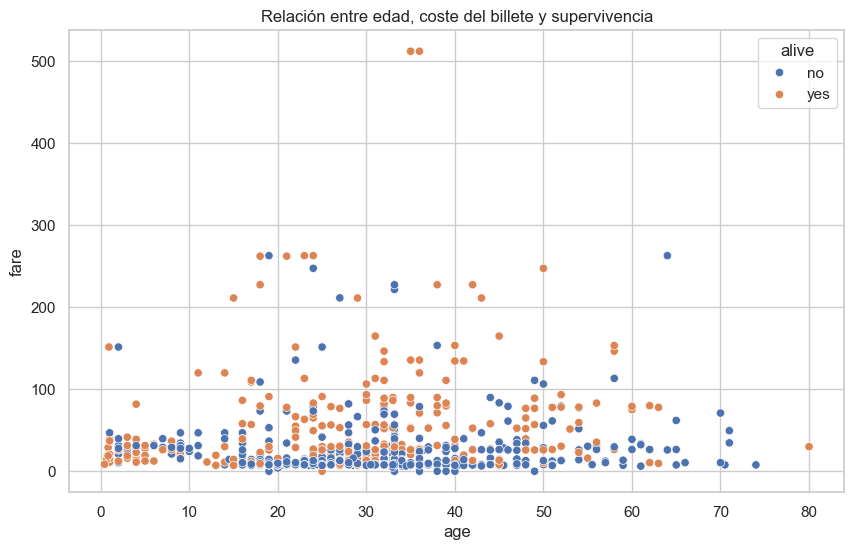

In [20]:
sns.scatterplot(x="age", y="fare", hue="alive", data=df_titanic)
plt.title("Relación entre edad, coste del billete y supervivencia")
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta_dataset = "./data/dataset_viajes_jun23.csv"  # Cambia esta ruta si es necesario
df_viajes_junio = pd.read_csv(ruta_dataset)

print("Columnas del dataset:", df_viajes_junio.columns)

viajes_por_compania = df_viajes_junio["Aircompany"].value_counts()
print("\nViajes por compañía aérea:\n", viajes_por_compania)

ingresos_por_compania = df_viajes_junio.groupby("Aircompany")["Ingresos"].sum()
print("\nIngresos totales por compañía aérea:\n", ingresos_por_compania)

plt.figure(figsize=(10, 6))
sns.barplot(x=ingresos_por_compania.index, y=ingresos_por_compania.values)
plt.title("Ingresos totales por compañía aérea (mes de junio)")
plt.ylabel("Ingresos totales")
plt.xlabel("Compañía aérea")
plt.xticks(rotation=45)
plt.show()

ingresos_promedio = ingresos_por_compania / viajes_por_compania
print("\nIngresos promedio por viaje:\n", ingresos_promedio)

plt.figure(figsize=(10, 6))
sns.barplot(x=ingresos_promedio.index, y=ingresos_promedio.values)
plt.title("Ingresos promedio por viaje (mes de junio)")
plt.ylabel("Ingresos promedio")
plt.xlabel("Compañía aérea")
plt.xticks(rotation=45)
plt.show()

print("\nSituación llamativa:")
print("Observa si TabarAir tiene ingresos desproporcionadamente bajos o altos.")
print("Compara el número de viajes realizados con los ingresos totales y promedio.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB
None
   aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta_dataset = "./data/dataset_viajes_jun23.csv"  # Cambia esta ruta si es necesario
df_viajes_junio = pd.read_csv(ruta_dataset)

print("Columnas en el dataset:", df_viajes_junio.columns)

"Ingresos", "Distancias" y "Consumo_kg"
variables_a_analizar = ["Ingresos", "Distancias", "Consumo_kg"]

if all(var in df_viajes_junio.columns for var in variables_a_analizar):
    print("\nEstadísticas descriptivas:")
    print(df_viajes_junio[variables_a_analizar].describe())

    sns.pairplot(df_viajes_junio, vars=variables_a_analizar, kind="scatter", diag_kind="kde")
    plt.suptitle("Relaciones entre Ingresos, Distancias y Consumo_kg", y=1.02)
    plt.show()

    correlaciones = df_viajes_junio[variables_a_analizar].corr()
    print("\nMatriz de correlación:")
    print(correlaciones)

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de correlación entre Ingresos, Distancias y Consumo_kg")
    plt.show()

    print("\nPatrones prometedores:")
    print("1. Revisa la correlación entre 'Distancias' y 'Consumo_kg'.")
    print("2. Si 'Ingresos' está altamente correlacionado con 'Distancias', podrían indicar que los vuelos largos generan más ingresos.")
    print("3. Busca posibles outliers, como vuelos con alto ingreso pero bajo consumo.")
else:
    print("Error: Alguna de las columnas especificadas no está presente en el dataset.")



Columnas en el dataset: Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')
Error: Alguna de las columnas especificadas no está presente en el dataset.


### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?


Estadísticas de 'distancia':
count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64


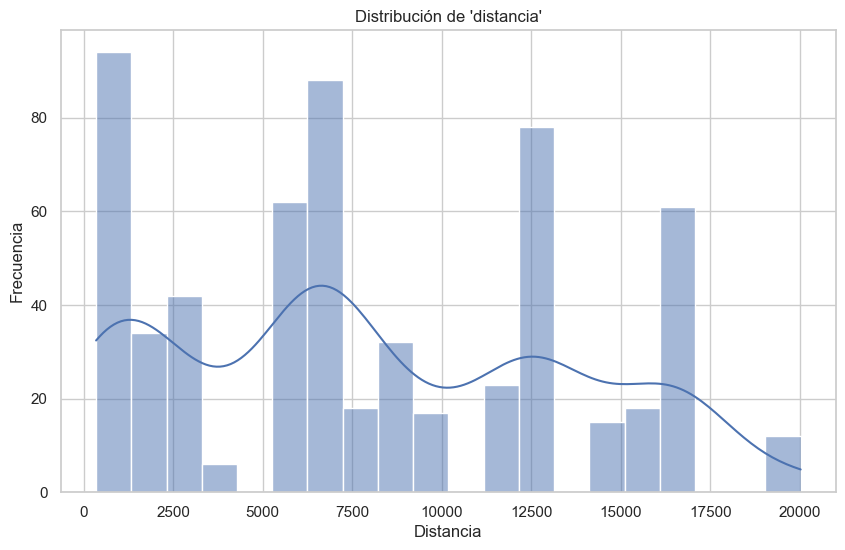


Distribución de 'cat_vuelo':
cat_vuelo
Muy Largo    454
Medio         85
Corto         32
Largo         29
Name: count, dtype: int64


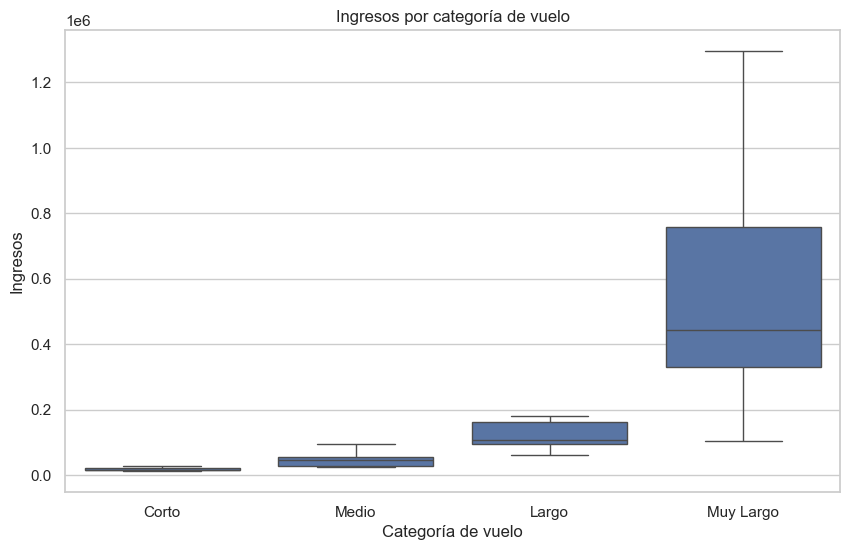

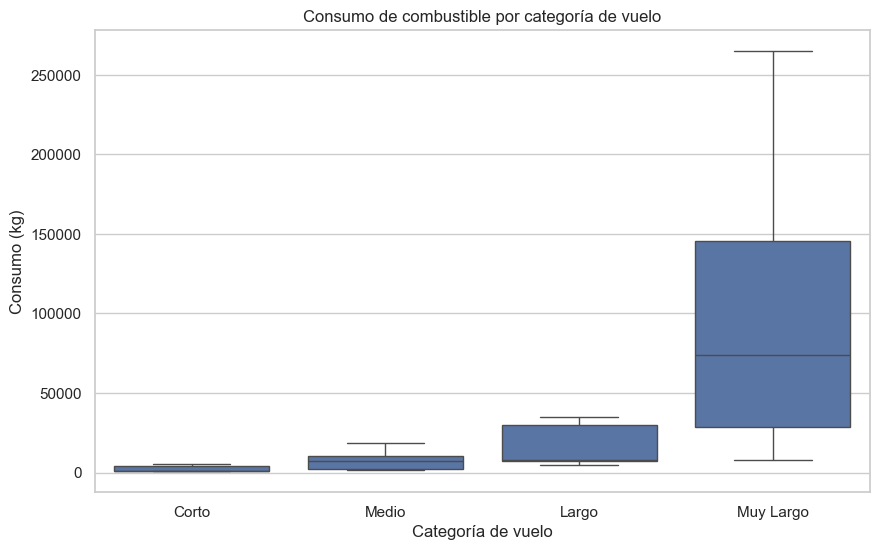

c:\Users\Jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

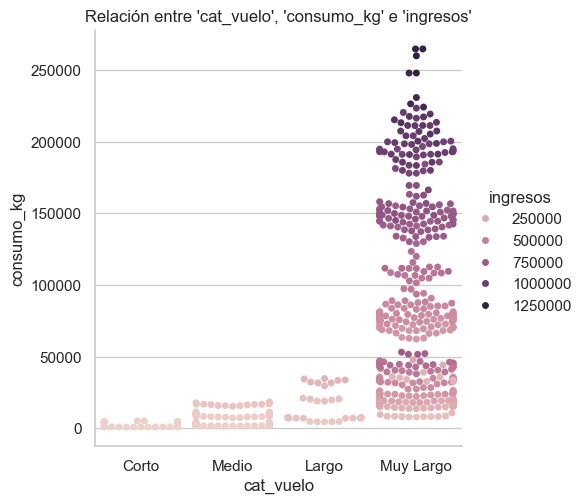


Observaciones:
1. Los vuelos más largos podrían generar más ingresos, pero también tienen un mayor consumo.
2. Podría haber vuelos de mediana distancia con ingresos desproporcionados (revisa los outliers).
3. Comparar la eficiencia de consumo de combustible para cada categoría podría ser interesante.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta_dataset = "./data/dataset_viajes_jun23.csv"  # Cambia esta ruta si es necesario
df_viajes_junio = pd.read_csv(ruta_dataset)

print("\nEstadísticas de 'distancia':")
print(df_viajes_junio["distancia"].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df_viajes_junio["distancia"], kde=True, bins=20)
plt.title("Distribución de 'distancia'")
plt.xlabel("Distancia")
plt.ylabel("Frecuencia")
plt.show()

bins = [0, 500, 1500, 3000, df_viajes_junio["distancia"].max()]
labels = ["Corto", "Medio", "Largo", "Muy Largo"]
df_viajes_junio["cat_vuelo"] = pd.cut(df_viajes_junio["distancia"], bins=bins, labels=labels, include_lowest=True)

print("\nDistribución de 'cat_vuelo':")
print(df_viajes_junio["cat_vuelo"].value_counts())

Relación entre "cat_vuelo", "ingresos" y "consumo_kg"
plt.figure(figsize=(10, 6))
sns.boxplot(x="cat_vuelo", y="ingresos", data=df_viajes_junio)
plt.title("Ingresos por categoría de vuelo")
plt.xlabel("Categoría de vuelo")
plt.ylabel("Ingresos")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="cat_vuelo", y="consumo_kg", data=df_viajes_junio)
plt.title("Consumo de combustible por categoría de vuelo")
plt.xlabel("Categoría de vuelo")
plt.ylabel("Consumo (kg)")
plt.show()

sns.catplot(x="cat_vuelo", y="consumo_kg", hue="ingresos", data=df_viajes_junio, kind="swarm")
plt.title("Relación entre 'cat_vuelo', 'consumo_kg' e 'ingresos'")
plt.show()

print("\nObservaciones:")
print("1. Los vuelos más largos podrían generar más ingresos, pero también tienen un mayor consumo.")
print("2. Podría haber vuelos de mediana distancia con ingresos desproporcionados (revisa los outliers).")
print("3. Comparar la eficiencia de consumo de combustible para cada categoría podría ser interesante.")


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.